In [589]:
# ライブラリの読み込み
import scipy as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# グラフをインラインで表示させる
%matplotlib inline

# Pandasでの表示が省略されないように設定
pd.set_option("max_columns", 100)
pd.set_option('max_rows',1000)
pd.set_option('max_info_columns',100)

In [590]:
data = pd.read_csv('merged_data.csv')
data = data.drop("Unnamed: 0", axis = 1)

test = data[data.isnull().any(axis=1)]
ori_test = pd.read_csv('test.csv')
train_ori = pd.read_csv('train_new.csv')

In [591]:
train = data.dropna()

In [601]:
test_ID = ori_test['id']
# split data for training
y_train = train['y']
X_train = train.drop(['y'], axis=1)

Training done using Random Forest


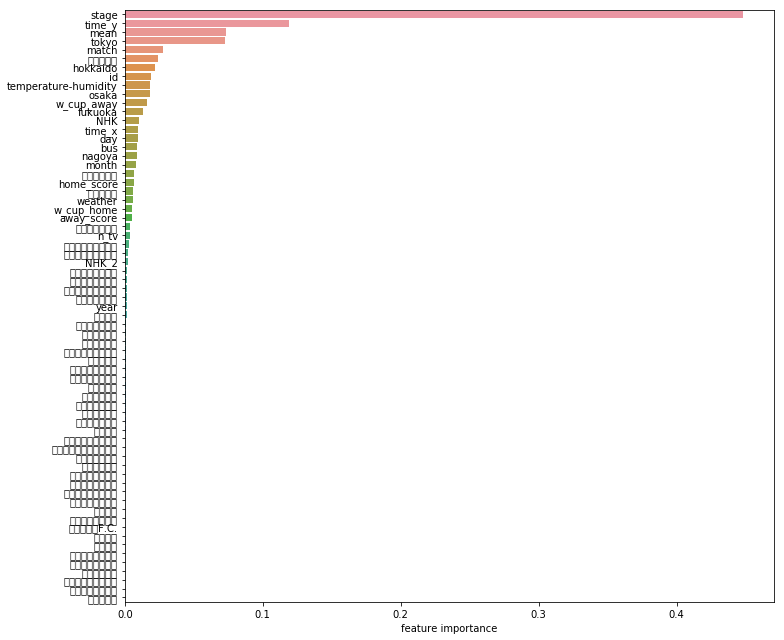

In [602]:
# feature importance using random forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=40, max_features='auto')
rf.fit(X_train, y_train)
print('Training done using Random Forest')

ranking = np.argsort(-rf.feature_importances_)
f, ax = plt.subplots(figsize=(11, 9))
sns.barplot(x=rf.feature_importances_[ranking], y=X_train.columns.values[ranking], orient='h')
ax.set_xlabel("feature importance")
plt.tight_layout()
plt.show()

In [603]:
# ホールド・アウト法によるデータの分割
# (X, y, テストにどの割合を割くか, 分割のしかたを決める乱数生成器)
# テストデータの割合は、test_size引数に指定することで変更可能です（今回は、train:test = 7:3）
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.3, random_state = 0)

In [604]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [605]:
rf = RandomForestRegressor()
print("Parameter optimization")
reg_rf = GridSearchCV(rf,
                   {'max_depth': [6,8,10],
                    'n_estimators': [20,40,60]
                    }, verbose=1)
reg_rf.fit(X_train, y_train)

Parameter optimization
Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    3.9s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [6, 8, 10], 'n_estimators': [20, 40, 60]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [606]:
print(reg_rf.score(X_train, y_train))
print(reg_rf.score(X_test,y_test))

0.9242044104498193
0.7794214520985784


In [607]:
rf = RandomForestRegressor(max_depth=10,n_estimators=20)
rf.fit(X_train, y_train)

print(rf.score(X_train, y_train))
print(rf.score(X_test,y_test))

0.9484076364425198
0.7787593045250238


In [210]:
reg_rf.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [608]:
print(lr.score(X_train, y_train))
print(lr.score(X_test,y_test))

0.7549143538525175
0.7009480502720599


In [609]:
# XGBoost
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

print("Parameter optimization")
xgb_model = xgb.XGBRegressor()
reg_xgb = GridSearchCV(xgb_model,
                   {'max_depth': [2,4,6],
                    'n_estimators': [50,100,200],
                    'reg_lambda' : [1, 3, 10]}, verbose=1
                   )
reg_xgb.fit(X_train, y_train)

Parameter optimization
Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed:   12.3s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [2, 4, 6], 'n_estimators': [50, 100, 200], 'reg_lambda': [1, 3, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [610]:
print("Parameter optimization")
xgb_model = xgb.XGBRegressor(max_depth=4, n_estimators=600, reg_lambda=1000)
xgb_model.fit(X_train, y_train)

Parameter optimization


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=600,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1000, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [611]:
# XGBoost
import xgboost as xgb

print("Parameter optimization")
xgb_model_2 = xgb.XGBRegressor(max_depth=4, n_estimators=50,reg_lambda=100,learning_rate=0.5 )
xgb_model_2.fit(X_train, y_train)

Parameter optimization


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.5, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=50,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=100, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [612]:
print(xgb_model.score(X_train,y_train))
print(xgb_model.score(X_test,y_test))

0.884345246934946
0.8165802871278101


In [613]:
print(xgb_model_2.score(X_train,y_train))
print(xgb_model_2.score(X_test,y_test))

0.9207034961199201
0.8410927709174623


In [614]:
print(reg_xgb.score(X_train,y_train))
print(reg_xgb.score(X_test,y_test))

0.9691501661090541
0.8311057946681321


In [615]:
test = test.drop(['id','y'], axis=1)


In [616]:
# second feature matrix
X_train2 = pd.DataFrame( {
     'XGB': xgb_model_2.predict(X_train),
    'XGB_2': xgb_model.predict(X_train)
    })
X_train2.head(5)

,XGB,XGB_2
0,17484.197266,16034.466797
1,6637.161133,5837.829102
2,7899.772461,8217.116211
3,13192.424805,13606.274414
4,11295.660156,11055.533203


In [617]:
# second-feature modeling using linear regression
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(X_train2, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [618]:
# second feature matrix
test_3 = pd.DataFrame( {
     'XGB': reg_xgb.predict(test),
     'XGB_2': xgb_model.predict(test)
    })


ValueError: feature_names mismatch: ['away_score', 'home_score', 'id', 'match', 'stage', 'time_x', 'weather', 'year', 'NHK', 'NHK_2', 'mean', 'temperature-humidity', 'アビスパ福岡', 'アルビレックス新潟', 'カターレ富山', 'カマタマーレ讃岐', 'ガイナーレ鳥取', 'ガンバ大阪', 'ギラヴァンツ北九州', 'コンサドーレ札幌', 'サガン鳥栖', 'サンフレッチェ広島', 'ザスパクサツ群馬', 'ザスパ草津', 'ジェフユナイテッド千葉', 'ジュビロ磐田', 'セレッソ大阪', 'ファジアーノ岡山', 'ベガルタ仙台', 'モンテディオ山形', 'ロアッソ熊本', 'ヴァンフォーレ甲府', 'ヴィッセル神戸', '京都サンガF.C.', '名古屋グランパス', '大分トリニータ', '大宮アルディージャ', '川崎フロンターレ', '徳島ヴォルティス', '愛媛ＦＣ', '東京ヴェルディ', '松本山雅ＦＣ', '柏レイソル', '栃木ＳＣ', '横浜Ｆ・マリノス', '横浜ＦＣ', '水戸ホーリーホック', '浦和レッズ', '清水エスパルス', '湘南ベルマーレ', '鹿島アントラーズ', 'ＦＣ岐阜', 'ＦＣ東京', 'ＦＣ町田ゼルビア', 'Ｖ・ファーレン長崎', 'month', 'day', 'n_tv', 'bus', 'time_y', 'w_cup_home', 'w_cup_away', 'hokkaido', 'tokyo', 'nagoya', 'osaka', 'fukuoka'] ['away_score', 'home_score', 'match', 'stage', 'time_x', 'weather', 'year', 'NHK', 'NHK_2', 'mean', 'temperature-humidity', 'アビスパ福岡', 'アルビレックス新潟', 'カターレ富山', 'カマタマーレ讃岐', 'ガイナーレ鳥取', 'ガンバ大阪', 'ギラヴァンツ北九州', 'コンサドーレ札幌', 'サガン鳥栖', 'サンフレッチェ広島', 'ザスパクサツ群馬', 'ザスパ草津', 'ジェフユナイテッド千葉', 'ジュビロ磐田', 'セレッソ大阪', 'ファジアーノ岡山', 'ベガルタ仙台', 'モンテディオ山形', 'ロアッソ熊本', 'ヴァンフォーレ甲府', 'ヴィッセル神戸', '京都サンガF.C.', '名古屋グランパス', '大分トリニータ', '大宮アルディージャ', '川崎フロンターレ', '徳島ヴォルティス', '愛媛ＦＣ', '東京ヴェルディ', '松本山雅ＦＣ', '柏レイソル', '栃木ＳＣ', '横浜Ｆ・マリノス', '横浜ＦＣ', '水戸ホーリーホック', '浦和レッズ', '清水エスパルス', '湘南ベルマーレ', '鹿島アントラーズ', 'ＦＣ岐阜', 'ＦＣ東京', 'ＦＣ町田ゼルビア', 'Ｖ・ファーレン長崎', 'month', 'day', 'n_tv', 'bus', 'time_y', 'w_cup_home', 'w_cup_away', 'hokkaido', 'tokyo', 'nagoya', 'osaka', 'fukuoka']
expected id in input data

In [619]:
y_pred_2 = reg_xgb.predict(test)
y_pred_3 = xgb_model.predict(test)

ValueError: feature_names mismatch: ['away_score', 'home_score', 'id', 'match', 'stage', 'time_x', 'weather', 'year', 'NHK', 'NHK_2', 'mean', 'temperature-humidity', 'アビスパ福岡', 'アルビレックス新潟', 'カターレ富山', 'カマタマーレ讃岐', 'ガイナーレ鳥取', 'ガンバ大阪', 'ギラヴァンツ北九州', 'コンサドーレ札幌', 'サガン鳥栖', 'サンフレッチェ広島', 'ザスパクサツ群馬', 'ザスパ草津', 'ジェフユナイテッド千葉', 'ジュビロ磐田', 'セレッソ大阪', 'ファジアーノ岡山', 'ベガルタ仙台', 'モンテディオ山形', 'ロアッソ熊本', 'ヴァンフォーレ甲府', 'ヴィッセル神戸', '京都サンガF.C.', '名古屋グランパス', '大分トリニータ', '大宮アルディージャ', '川崎フロンターレ', '徳島ヴォルティス', '愛媛ＦＣ', '東京ヴェルディ', '松本山雅ＦＣ', '柏レイソル', '栃木ＳＣ', '横浜Ｆ・マリノス', '横浜ＦＣ', '水戸ホーリーホック', '浦和レッズ', '清水エスパルス', '湘南ベルマーレ', '鹿島アントラーズ', 'ＦＣ岐阜', 'ＦＣ東京', 'ＦＣ町田ゼルビア', 'Ｖ・ファーレン長崎', 'month', 'day', 'n_tv', 'bus', 'time_y', 'w_cup_home', 'w_cup_away', 'hokkaido', 'tokyo', 'nagoya', 'osaka', 'fukuoka'] ['away_score', 'home_score', 'match', 'stage', 'time_x', 'weather', 'year', 'NHK', 'NHK_2', 'mean', 'temperature-humidity', 'アビスパ福岡', 'アルビレックス新潟', 'カターレ富山', 'カマタマーレ讃岐', 'ガイナーレ鳥取', 'ガンバ大阪', 'ギラヴァンツ北九州', 'コンサドーレ札幌', 'サガン鳥栖', 'サンフレッチェ広島', 'ザスパクサツ群馬', 'ザスパ草津', 'ジェフユナイテッド千葉', 'ジュビロ磐田', 'セレッソ大阪', 'ファジアーノ岡山', 'ベガルタ仙台', 'モンテディオ山形', 'ロアッソ熊本', 'ヴァンフォーレ甲府', 'ヴィッセル神戸', '京都サンガF.C.', '名古屋グランパス', '大分トリニータ', '大宮アルディージャ', '川崎フロンターレ', '徳島ヴォルティス', '愛媛ＦＣ', '東京ヴェルディ', '松本山雅ＦＣ', '柏レイソル', '栃木ＳＣ', '横浜Ｆ・マリノス', '横浜ＦＣ', '水戸ホーリーホック', '浦和レッズ', '清水エスパルス', '湘南ベルマーレ', '鹿島アントラーズ', 'ＦＣ岐阜', 'ＦＣ東京', 'ＦＣ町田ゼルビア', 'Ｖ・ファーレン長崎', 'month', 'day', 'n_tv', 'bus', 'time_y', 'w_cup_home', 'w_cup_away', 'hokkaido', 'tokyo', 'nagoya', 'osaka', 'fukuoka']
expected id in input data

In [620]:

y_pred_4 = reg.predict(test_3)

In [107]:
submission = pd.DataFrame({
    "id": test_ID,
    "y": y_pred_3
})
submission.to_csv('j_league_xgb_2.csv', index=False)


In [216]:
submission = pd.DataFrame({
    "id": test_ID,
    "y": y_pred_4
})
submission.to_csv('j_league_exp.csv', index=False)


In [217]:
y_pred_4

array([17887.848 , 14550.736 , 15243.06  , 15221.303 , 15285.    ,
       18144.04  , 14815.217 , 15170.669 , 22009.338 , 18778.203 ,
       22034.152 , 16320.629 , 15311.031 , 16627.973 , 23403.523 ,
       14625.521 , 16905.432 , 13257.624 , 17426.785 , 22979.875 ,
       17064.035 , 16481.793 , 18477.53  , 15470.861 , 18551.29  ,
       19410.188 , 10101.673 , 10270.428 , 13258.494 , 17606.865 ,
       21663.701 , 10690.77  , 12465.133 , 10260.01  , 10452.584 ,
       15398.375 ,  9980.059 , 15334.597 , 28098.445 , 20064.75  ,
       20233.953 , 16069.292 , 19718.137 , 15754.506 , 11934.76  ,
       15821.463 , 20863.18  , 11720.281 , 10294.005 , 11183.904 ,
       12457.218 ,  8646.402 , 11708.762 , 14445.39  , 12374.586 ,
       10742.449 , 11132.037 , 10275.834 , 11993.504 ,  7233.0933,
       11506.293 , 11803.854 , 17222.658 , 14492.646 , 17350.904 ,
       18883.05  , 15483.566 , 13319.33  , 17695.984 , 18245.607 ,
       16493.898 , 36629.035 , 36539.324 , 34084.477 , 33064.9

In [315]:
# MSEを出力する関数を読み込む
from sklearn.metrics import mean_squared_error as mse

# RMSEをtrainとtestに分けて出力
# 過学習をしているかどうかを確認
print('RMSE')
print('train: %.3f' % (mse(y_train, lr.predict(X_train)) ** (1/2)))
print('test : %.3f' % (mse(y_test, lr.predict(X_test)) ** (1/2)))
print('train: %.3f' % (mse(y_train, reg_xgb.predict(X_train)) ** (1/2)))
print('test : %.3f' % (mse(y_test, reg_xgb.predict(X_test)) ** (1/2)))
print('train: %.3f' % (mse(y_train, reg_rf.predict(X_train)) ** (1/2)))
print('test : %.3f' % (mse(y_test, reg_rf.predict(X_test)) ** (1/2)))

RMSE
train: 3981.128
test : 4507.968
train: 1456.355
test : 3324.335
train: 1942.577
test : 3814.708


In [318]:
# 残差プロットを行う関数を定義
def res_plot(y_train, y_train_pred, y_test, y_test_pred):
    # train, testごとに残差を算出
    res_train = y_train_pred - y_train
    res_test  = y_test_pred - y_test
    
    # train, testごとに(予測値, 残差)をプロット
    plt.figure(figsize=(8, 8))
    plt.scatter(y_train_pred, res_train, color='blue', marker='o', label='train', alpha=0.5)
    plt.scatter(y_test_pred, res_test, color='green', marker='s', label='test', alpha=0.5)
    
    plt.xlabel('Predicted Values')                  # x軸のラベルを表示
    plt.ylabel('Residuals')                         # y軸のラベルを表示
    plt.legend(loc='upper left')                    # 凡例を左上に表示
    plt.hlines(y=0, xmin=-10, xmax=50, color='red') # 残差0の線を表示
    plt.xlim([-10, 50])                             # 表示する横軸の範囲を指定
    plt.show()

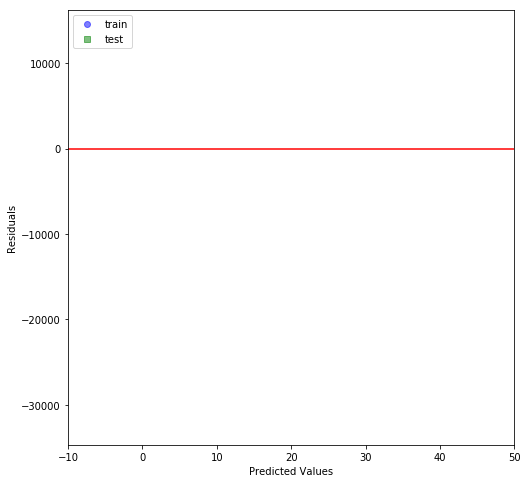

In [319]:
# 残差プロットを出力
res_plot(y_train, reg_xgb.predict(X_train), y_test, reg_xgb.predict(X_test))